In [ ]:
import tensorflow as tf

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist

In [ ]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress","Coat", "Sandal", "Shirt", "Sneaker","Bag","Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Ankle boot'

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[1]

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[-0.0011288 , -0.02011776,  0.03334904, ...,  0.02273693,
         0.06814419,  0.04588836],
       [-0.02257174, -0.04511175, -0.0331466 , ...,  0.0260173 ,
        -0.0457283 ,  0.03367815],
       [ 0.06919688, -0.03815505, -0.06954376, ...,  0.03249852,
         0.01424296,  0.01088224],
       ...,
       [-0.02466419,  0.04127423,  0.05668412, ...,  0.00966074,
        -0.01846711, -0.05392684],
       [-0.01242852,  0.01729239, -0.01654708, ...,  0.02467786,
         0.01258706, -0.05962454],
       [-0.06828153,  0.00797519,  0.01597558, ..., -0.05840416,
        -0.05697738, -0.02442889]], dtype=float32)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "sgd",
    metrics = ["accuracy"]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data = (X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7200 - accuracy: 0.7630 - val_loss: 0.5065 - val_accuracy: 0.8292
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4869 - accuracy: 0.8303 - val_loss: 0.4628 - val_accuracy: 0.8348
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4400 - accuracy: 0.8460 - val_loss: 0.4250 - val_accuracy: 0.8554
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4146 - accuracy: 0.8548 - val_loss: 0.3951 - val_accuracy: 0.8620
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3938 - accuracy: 0.8612 - val_loss: 0.3881 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3779 - accuracy: 0.8663 - val_loss: 0.3978 - val_accuracy: 0.8612
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3655 - accuracy: 0.8702 - val_loss: 0.3720 - val_accuracy:

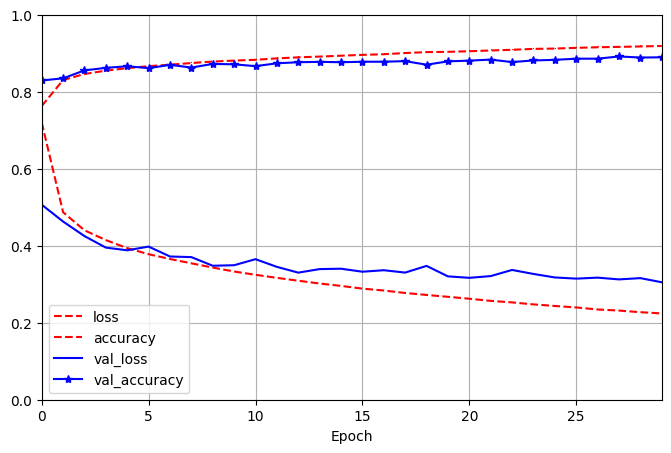

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5),
                                   xlim=[0,29],
                                   ylim=[0,1],
                                   grid=True,
                                   xlabel="Epoch",
                                   style = ["r--","r--,","b-","b-*"])
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3230 - accuracy: 0.8845


[0.3229997754096985, 0.8845000267028809]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)

1/1 [==============================] - 0s 125ms/step


In [ ]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')